# Análisis de los datos obtenidos 

Uso de ipython para el análsis y muestra de los datos obtenidos durante la producción.Se implementa un regulador experto. Los datos analizados son del día 13 de Agosto del 2015

Los datos del experimento:
* Hora de inicio: 13:10
* Hora final : 13:40
* Filamento extruido: 453cm
* $T: 150ºC$
* $V_{min} tractora: 1.5 mm/s$
* $V_{max} tractora: 3.4 mm/s$
* Se restrigen las reglas al sistema experto. Haciendo los incrementos de velocidades menores.

* Los incrementos de velocidades en las reglas del sistema experto son distintas:
    * En los caso 3 y 5 se mantiene un incremento de +2.
    * En los casos 4 y 6 se reduce el incremento a -1.
    

In [8]:
#Importamos las librerías utilizadas
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
#Mostramos las versiones usadas de cada librerías
print ("Numpy v{}".format(np.__version__))
print ("Pandas v{}".format(pd.__version__))
print ("Seaborn v{}".format(sns.__version__))

Numpy v1.9.2
Pandas v0.16.2
Seaborn v0.6.0


In [10]:
#Abrimos el fichero csv con los datos de la muestra
datos = pd.read_csv('ensayo6.CSV')

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
#Almacenamos en una lista las columnas del fichero con las que vamos a trabajar
columns = ['Diametro X','Diametro Y', 'RPM TRAC']

In [13]:
#Mostramos un resumen de los datos obtenidoss
datos[columns].describe()
#datos.describe().loc['mean',['Diametro X [mm]', 'Diametro Y [mm]']]

,Diametro X,Diametro Y,RPM TRAC
count,1087.000000,1087.000000,1087.000000
mean,1.715447,1.712338,2.278604
std,0.265756,0.265733,0.973833
min,1.057759,1.057701,1.497500
25%,1.493615,1.482943,1.497500
50%,1.688603,1.678324,1.497500
75%,1.952410,1.931171,3.500000
max,2.422675,2.459850,3.500000


Representamos ambos diámetro y la velocidad de la tractora en la misma gráfica

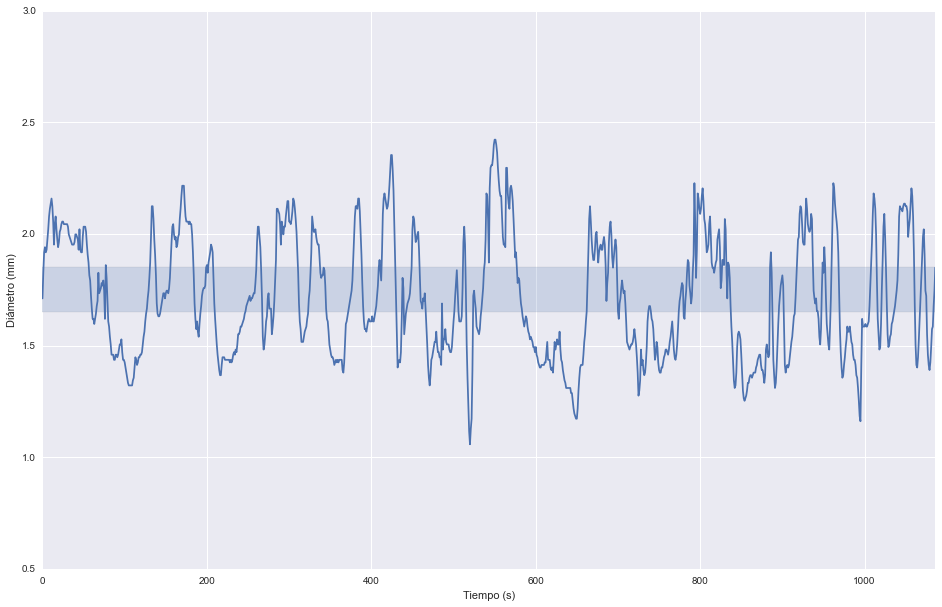

In [14]:
graf = datos.ix[:, "Diametro X"].plot(figsize=(16,10),ylim=(0.5,3))
graf.axhspan(1.65,1.85, alpha=0.2)
graf.set_xlabel('Tiempo (s)')
graf.set_ylabel('Diámetro (mm)')
#datos['RPM TRAC'].plot(secondary_y='RPM TRAC')

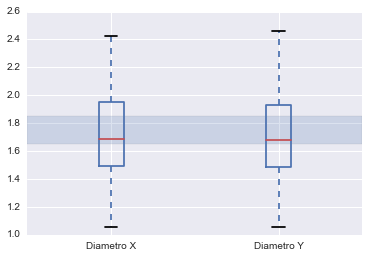

In [15]:
box = datos.ix[:, "Diametro X":"Diametro Y"].boxplot(return_type='axes')
box.axhspan(1.65,1.85, alpha=0.2)

Aumentando la velocidad se ha conseguido que disminuya el valor máxima, sin embargo ha disminuido el valor mínimo. Para la siguiente iteracción, se va a volver a las velocidades de 1.5- 3.4 y se van a añadir más reglas con unos incrementos de velocidades menores, para evitar saturar la velocidad de traccción tanto a nivel alto como nivel bajo.

Comparativa de Diametro X frente a Diametro Y para ver el ratio del filamento

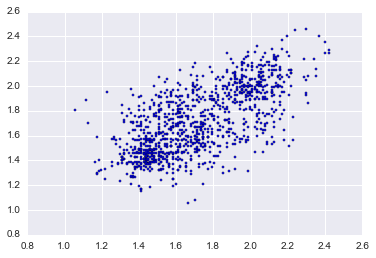

In [16]:
plt.scatter(x=datos['Diametro X'], y=datos['Diametro Y'], marker='.')

#Filtrado de datos
Las muestras tomadas $d_x >= 0.9$ or $d_y >= 0.9$ las asumimos como error del sensor, por ello las filtramos de las muestras tomadas.

In [17]:
datos_filtrados = datos[(datos['Diametro X'] >= 0.9) & (datos['Diametro Y'] >= 0.9)]

In [18]:
#datos_filtrados.ix[:, "Diametro X":"Diametro Y"].boxplot(return_type='axes')

##Representación de X/Y

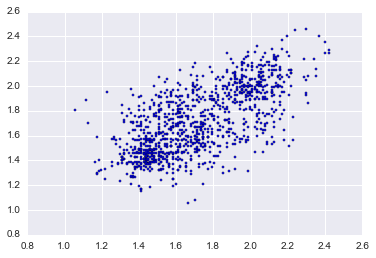

In [19]:
plt.scatter(x=datos_filtrados['Diametro X'], y=datos_filtrados['Diametro Y'], marker='.')

#Analizamos datos del ratio

In [20]:
ratio = datos_filtrados['Diametro X']/datos_filtrados['Diametro Y']
ratio.describe()

count    1087.000000
mean        1.010032
std         0.129464
min         0.586098
25%         0.927785
50%         1.004409
75%         1.078988
max         1.574796
dtype: float64

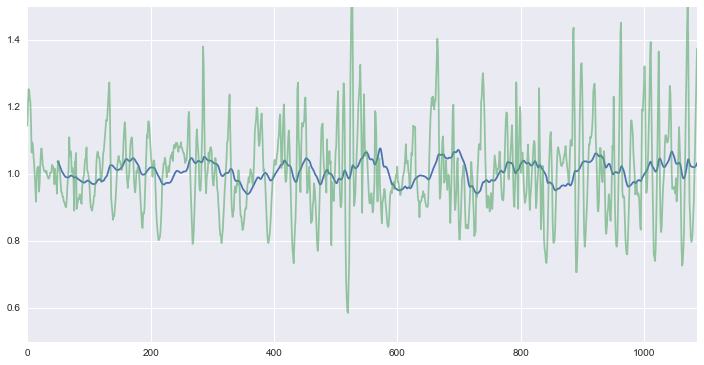

In [21]:
rolling_mean = pd.rolling_mean(ratio, 50)
rolling_std = pd.rolling_std(ratio, 50)
rolling_mean.plot(figsize=(12,6))
# plt.fill_between(ratio, y1=rolling_mean+rolling_std, y2=rolling_mean-rolling_std, alpha=0.5)
ratio.plot(figsize=(12,6), alpha=0.6, ylim=(0.5,1.5))

#Límites de calidad

Calculamos el número de veces que traspasamos unos límites de calidad. 
$Th^+ = 1.85$ and $Th^- = 1.65$ 

In [22]:
Th_u = 1.85
Th_d = 1.65

In [23]:
data_violations = datos[(datos['Diametro X'] > Th_u) | (datos['Diametro X'] < Th_d) |
                       (datos['Diametro Y'] > Th_u) | (datos['Diametro Y'] < Th_d)]

In [24]:
data_violations.describe()

,Tmp Husillo,Tmp Nozzle,Diametro X,Diametro Y,MARCHA,PARO,RPM EXTR,RPM TRAC
count,1027.000000,1027.000000,1027.000000,1027.000000,1027,1027,1027,1027.000000
mean,66.607887,151.351509,1.713664,1.710990,1,1,0,2.286324
std,0.277320,0.873067,0.272994,0.272955,0,0,0,0.976169
min,66.200000,149.500000,1.057759,1.057701,True,True,0,1.497500
25%,66.400000,150.600000,1.482145,1.471450,1,1,0,1.497500
50%,66.500000,151.500000,1.654193,1.666831,1,1,0,1.497500
75%,66.600000,152.100000,1.952410,1.942664,1,1,0,3.500000
max,67.500000,153.200000,2.422675,2.459850,True,True,0,3.500000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x08A135D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0870A370>], dtype=object)

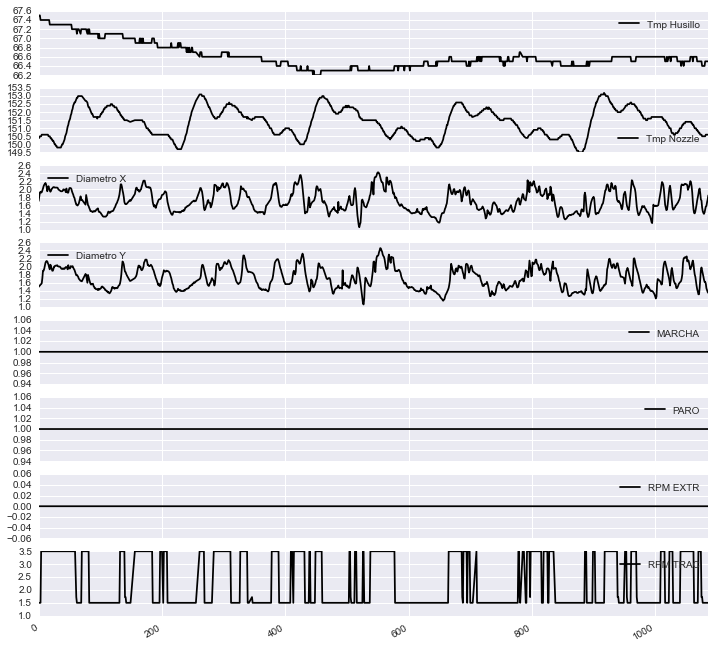

In [25]:
data_violations.plot(subplots=True, figsize=(12,12))